# Анализ сервиса продажи самокатов
В данных содержится информация о пользователях из нескольких городов, а также об их поездках.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

**Цель:** Проанализировать данные и проверить некоторые гипотезы.

**Этапы:**
 - Загрузка файлов и считывание данных.
 - Проверка данных на наличие несоответствия типов данных и дубликатов.
 - Описание и визуализация информации о поездках
 - Обьединение датафреймов
 - Подсчет выручки
 - Проверка гипотез
 - Общий вывод

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv:
 * user_id - уникальный идентификатор пользователя
 * name - имя пользователя
 * age - возраст
 * city - город
 * subscription_type - тип подписки (free, ultra)
 
Поездки — rides_go.csv:
 * user_id - уникальный идентификатор пользователя
 * distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
 * duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
 * date - дата совершения поездки

Подписки — subscriptions_go.csv:
 * subscription_type - тип подписки
 * minute_price - стоимость одной минуты поездки по данной подписке
 * start_ride_price - стоимость начала поездки
 * subscription_fee - стоимость ежемесячного платежа

**Импорт библиотек**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns
from math import factorial

## Шаг 1. Загрузка данных

### Считывание данных из файлов и их загрузка в датафремы

In [21]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

### Вывод первых строк и общей информации каждого датафрейма

#### Информация о пользователях

In [22]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [24]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


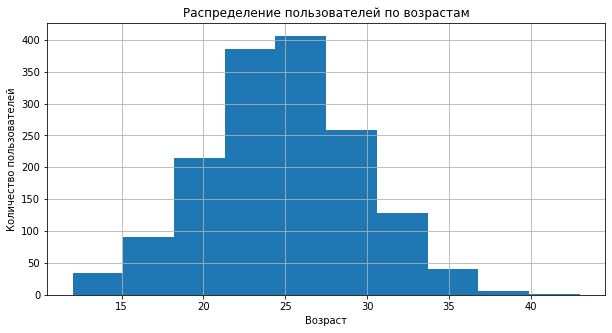

In [25]:
users['age'].hist(figsize = (10, 5));
plt.title('Распределение пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей');

Пропусков нет, аномальных значений в возрасте не наблюдается, проблем в типах данных не обнаружено. Распределение значений на графике близко к нормальному.

#### Информация о поездках

In [26]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [27]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [28]:
rides.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


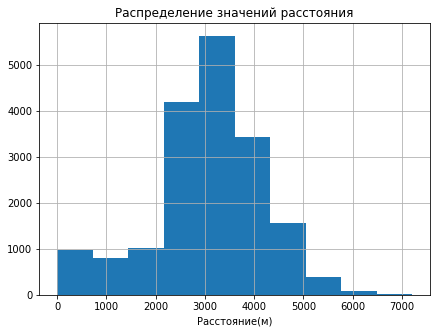

In [29]:
rides['distance'].hist(figsize = (7, 5));
plt.title('Распределение значений расстояния')
plt.xlabel('Расстояние(м)');

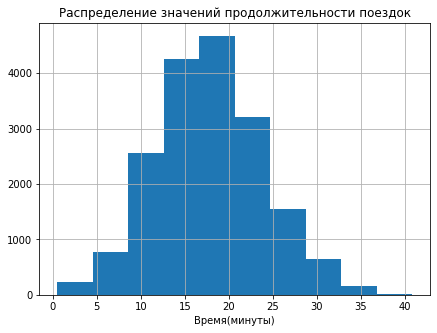

In [30]:
rides['duration'].hist(figsize = (7, 5))
plt.title('Распределение значений продолжительности поездок')
plt.xlabel('Время(минуты)');

В целом все хорошо, также нет пропусков, сильных отклонений в графиках и аномально больших и малых значений, но нужно изменить тип данных у столбца 'date'

#### Информация о подписках

In [31]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [32]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [33]:
subscriptions.describe().T

,count,mean,std,min,25%,50%,75%,max
minute_price,2.0,7.0,1.414214,6.0,6.50,7.0,7.50,8.0
start_ride_price,2.0,25.0,35.355339,0.0,12.50,25.0,37.50,50.0
subscription_fee,2.0,99.5,140.714249,0.0,49.75,99.5,149.25,199.0


С данными и типами данных все в порядке.

## Шаг 2. Предобработка данных

### Изменение типа данных у столбца date 

In [34]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создание нового столбца с номером месяца

Проверим за сколько лет содержаться данные в таблице о пользователях, т.к. если представлены данные за несколько лет, то месяца разных годов могут слится в один.

In [35]:
rides['date'].dt.year.unique()

array([2021])

Данные предоставлены за один год, поэтому можно применить следующий метод

In [36]:
rides['month'] = rides['date'].dt.month
rides.head()
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


### Проверка на наличие пропущенных значений и дубликатов в датафреймах.

Проверим на наличие пропусков с помощью комбинации методов.

In [37]:
print('Пропуски в таблице "users" \n', users.isna().sum())
print()
print('Пропуски в таблице "rides" \n', rides.isna().sum())
print()
print('Пропуски в таблице "subcriptions" \n', subscriptions.isna().sum())

Пропуски в таблице "users" 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропуски в таблице "rides" 
 user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропуски в таблице "subcriptions" 
 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


#### Проверка на наличие явных дубликатов

In [38]:
print('Явных дубликатов в таблице "users"', users.duplicated().sum())
print()
print('Явных дубликатов в таблице "rides"', rides.duplicated().sum())
print()
print('Явных дубликатов в таблице "subcriptions"', subscriptions.duplicated().sum())

Явных дубликатов в таблице "users" 31

Явных дубликатов в таблице "rides" 0

Явных дубликатов в таблице "subcriptions" 0


In [39]:
users = users.drop_duplicates().reset_index(drop = True)
print('Явных дубликатов в таблице "users"', users.duplicated().sum())

Явных дубликатов в таблице "users" 0


#### Проверка на наличие неявных дубликатов

Проверим названия городов в таблице пользователей на наличие неявных дубликатов

In [40]:
users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

**Вывод**

Изменен тип данных у столбца с датами на корректный формат, добавлен столбец с номером месяца.

При проверке таблиц пропуски не обнаружены, явные дубликаты содержались в таблице 'users' и были удалены. Неявные дубликаты также не выявлены.

## Шаг 3. Исследовательский анализ данных

В разделе будем описывать и визуализировать общую информацию о пользователях и поездках:
 - частота встречаемости городов;
 - соотношение пользователей с подпиской и без подписки;
 - возраст пользователей;
 - расстояние, которое пользователь преодолел за одну поездку;
 - продолжительность поездок.

### Частота встречаемости городов

In [41]:
cities = users['city'].value_counts()
cities

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

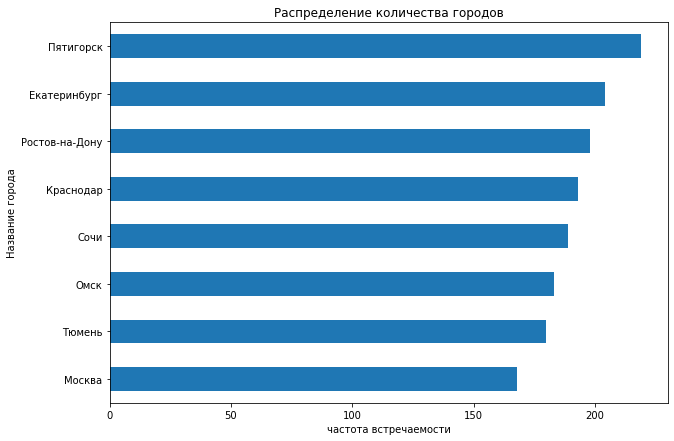

In [42]:
cities.sort_values().plot(kind = 'barh', figsize = (10, 7))

plt.title('Распределение количества городов')
plt.ylabel('Название города')
plt.xlabel('частота встречаемости');

Из диаграммы можно сделать следующие выводы:
 - Чаще всего в таблице встречается город с названием "Пятигорск"
 - Меньше всего упоминается Москва
 - Города распределены равномерно

### Соотношение пользователей с подпиской и без подписки

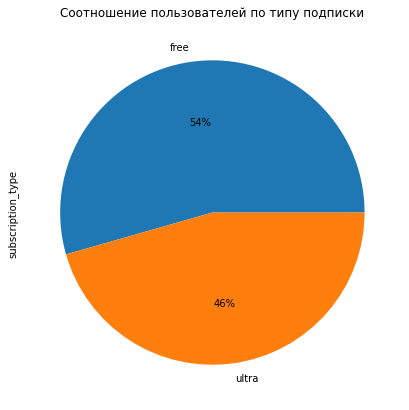

In [43]:
users['subscription_type'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение пользователей по типу подписки'
);

Пользователей без подписки больше, чем тех, кто оформил подписку.

### Возраст пользователей

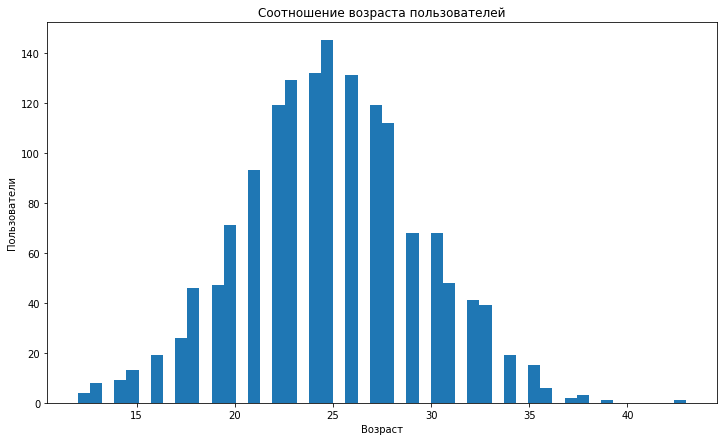

In [44]:
users['age'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    title = 'Соотношение возраста пользователей'
)
plt.xlabel('Возраст')
plt.ylabel('Пользователи');

In [45]:
age = users['age']
age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Большую часть пользователей составляют от 22 до 28 лет. Меньше всего используют самокаты для передвижения следующие возрастные группы:
 - до 18 лет
 - после 32
 - люди за 40 предпочитают их вовсе не использовать

### Расстояние, которое пользователь преодолел за одну поездку

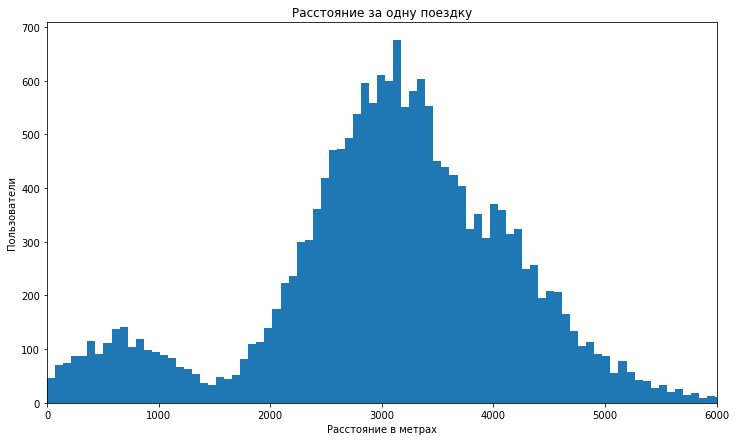

In [46]:
rides['distance'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 100,
    xlim = (0, 6000),
    title = 'Расстояние за одну поездку'
)
plt.xlabel('Расстояние в метрах')
plt.ylabel('Пользователи');

In [47]:
max_distance = round(rides['distance'].max(), 2)
max_distance

7211.01

В большинстве случаев преодолевают расстояния от 2800 до 3200 метров, ещё наблюдается пик значений от 500 до 1000 метров. Самое большое расстояние составляет примерно 7200 метров, но это единичные случаи.

### Продолжительность поездок

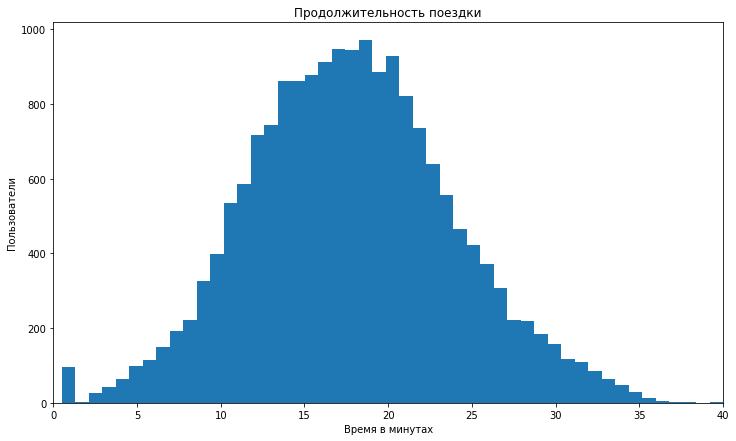

In [48]:
rides['duration'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (0, 40),
    title = 'Продолжительность поездки'
)
plt.xlabel('Время в минутах')
plt.ylabel('Пользователи');

In [49]:
mean_time = round(rides['duration'].mean(), 2)
mean_time

17.81

Большинство поездок имеют продолжительность от 12 до 20 минут, наблюдается небольшой пик значений около нуля, который нужно рассмотреть. Среднее время поездок составляет примерно 18 минут, ещё можно заметить, что идет значительный спад после 25 минут использования самоката.

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
Name: duration, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


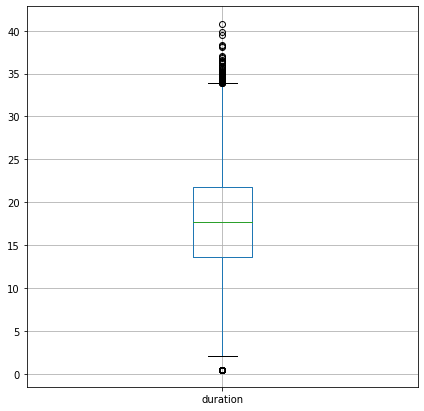

In [50]:
print(rides['duration'].sort_values().head())
print(rides.boxplot(column = 'duration', figsize = (7, 7)))

Либо люди быстро передумывали брать самокат, либо это ошибка при заполнении данных. Посмотрим сколько всего таких значений

In [51]:
min_duration = rides.query('duration == 0.5')
min_duration['duration'].count()

95

## Шаг 4. Объединение данных

### Обьединение данных о ползователях, поездках и подписках в один датафрейм

In [52]:
service_info = users.merge(rides, on = 'user_id', how = 'left')
service_info = service_info.merge(subscriptions, on = 'subscription_type', how = 'left')
service_info.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [53]:
service_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [54]:
service_info.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,40.823963,12.000000,8.000000,50.000000,199.000000


### Создание ещё двух датафреймов из датафрейма 'service_info'

 1. 'free_data' c данными о пользователях без подписки
 2. 'ultra_data' с данными о пользователях с подпиской

#### Создание датафрейма с данными о пользователях без подписки

In [55]:
free_data = service_info.query('subscription_type == "free"')
free_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [56]:
free_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


#### Создание датафрейма о пользователях с подпиской

In [57]:
ultra_data = service_info.query('subscription_type == "ultra"')
ultra_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [58]:
ultra_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

#### Информация о расстоянии и времени поездок для пользователей без подписки

Посмотрим как изменился график для расстояния у 'free_data'.

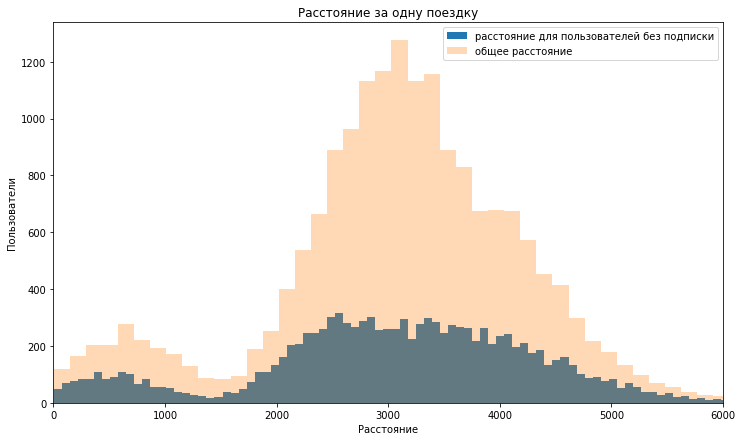

In [59]:
free_data['distance'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 100,
    xlim = (0, 6000),
    label = 'расстояние для пользователей без подписки',
    title = 'Расстояние за одну поездку'
)
rides['distance'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (0, 6000),
    alpha = 0.3,
    label = 'общее расстояние'
)
plt.legend()
plt.xlabel('Расстояние')
plt.ylabel('Пользователи');

График претерпел не сильные изменения, за исключением появления нескольких пиков значений. Но по прежнему наблюдается рост от 0 до 1000 м, от 2000 до 4000. Появился новый спад на 3000 м.

Также рассмотрим график для продолжительности поездки для людей без подписки.

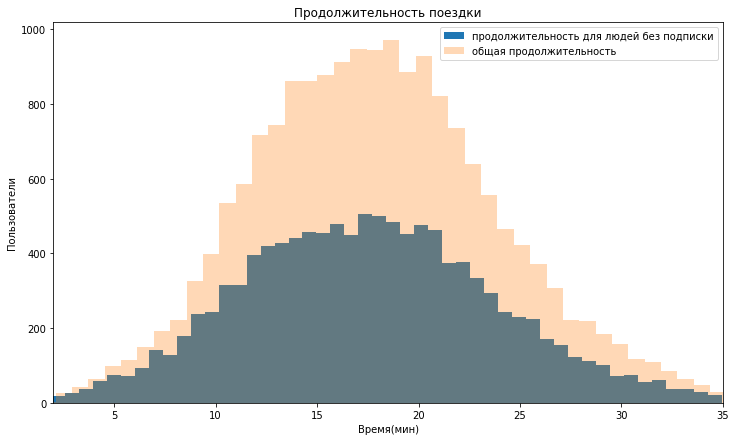

In [60]:
free_data['duration'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (2, 35),
    label = 'продолжительность для людей без подписки',
    title = 'Продолжительность поездки'
)
rides['duration'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (2, 35),
    alpha = 0.3,
    label = 'общая продолжительность',
)
plt.legend()
plt.xlabel('Время(мин)')
plt.ylabel('Пользователи');

В случае графика продолжительности, он почти повторяет первоначальный силуэт, пики значений не поменялись, но появилось два новых пика: 12 минут и 22 минуты.

#### Информация о расстоянии и времени поездок для пользователей c с подпиской

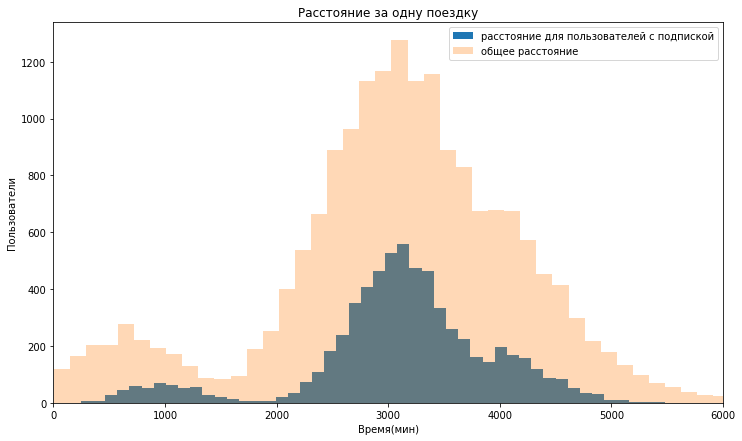

In [61]:
ultra_data['distance'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (0, 6000),
    label = 'расстояние для пользователей с подпиской',
    title = 'Расстояние за одну поездку'
)
rides['distance'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (0, 6000),
    alpha = 0.3,
    label = 'общее расстояние',
)
plt.legend()
plt.xlabel('Время(мин)')
plt.ylabel('Пользователи');

График почти не поменялся, появился небольшой сдвиг значений от 0 до 1000 и сместилось максимальное значение на этом промежутке.

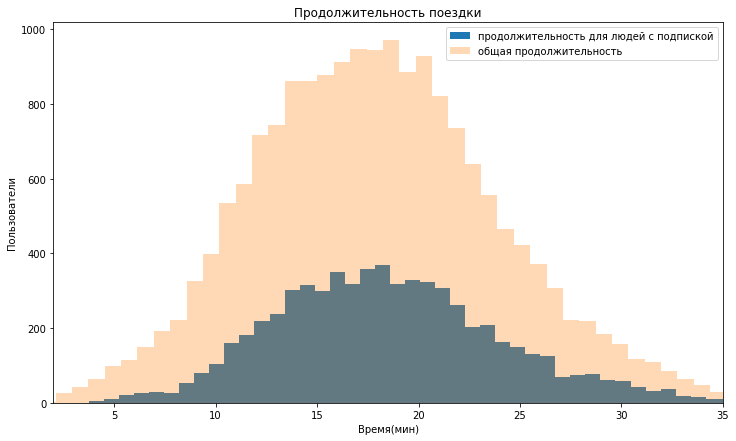

In [62]:
ultra_data['duration'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (2, 35),
    label = 'продолжительность для людей с подпиской',
    title = 'Продолжительность поездки'
)
rides['duration'].plot(
    kind = 'hist',
    figsize = (12, 7),
    bins = 50,
    xlim = (2, 35),
    alpha = 0.3,
    label = 'общая продолжительность',
)
plt.legend()
plt.xlabel('Время(мин)')
plt.ylabel('Пользователи');

Наблюдаются минимальные изменения в графике

## Шаг 5. Подсчёт выручки

### Создание датафрейма с агрегированными данными на основе датафрейма 'service_info'

Найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Округляем значения в столбце 'duration'.

In [63]:
service_info['duration'] = np.ceil(service_info['duration'])
service_info['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

In [64]:
pivot_info = service_info.pivot_table(index = ['user_id', 'month'],
                                      values = ['distance', 
                                                'duration',
                                                'name',
                                                'subscription_type'],
                                      aggfunc = {'distance': sum,
                                                 'duration': sum,
                                                 'name': len,
                                                 'subscription_type': min})
pivot_info.head(20)

distance  duration  name subscription_type
user_id month                                                
1       1       7027.511294      42.0     2             ultra
        4        754.159807       7.0     1             ultra
        8       6723.470560      46.0     2             ultra
        10      5809.911100      32.0     2             ultra
        11      7003.499363      56.0     3             ultra
        12      6751.629942      28.0     2             ultra
2       3      10187.723006      63.0     3             ultra
        4       6164.381824      40.0     2             ultra
        6       3255.338202      14.0     1             ultra
        7       6780.722964      48.0     2             ultra
        8        923.007439       7.0     1             ultra
        10      2824.636598      19.0     1             ultra
        12      3828.248580      12.0     1             ultra
3       1       3061.777147      13.0     1             ultra
        2       5421.152016      39.0     2             ultra
        4       2956.651632      21.0     1             ultra
        5       9064.026918      63.0     3             ultra
        7      10919.595403      67.0     3             ultra
        9       2891.012822      23.0     1             ultra
        12      2593.381928      13.0     1             ultra

В колонке 'name' содержится количество поездок, поэтому следует переименовать столбец

In [65]:
pivot_info = pivot_info.rename(columns = {'name':'ride_count'})
pivot_info.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           11331 non-null  float64
 1   duration           11331 non-null  float64
 2   ride_count         11331 non-null  int64  
 3   subscription_type  11331 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 399.5+ KB


### Добавление столбца с помесячной выручкой 

Добавляем столбец 'monthly_revenue' с расчетом помесячной выручки.

In [66]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [67]:
def revenue(item):
    sub_type = item['subscription_type']
    if sub_type == 'ultra':
        return 0 * item['ride_count'] + 6 * item['duration'] + 199
    if sub_type == 'free':
        return 50 * item['ride_count'] + 8 * item['duration'] + 0

In [68]:
pivot_info['month_revenue'] = pivot_info.apply(revenue, axis = 1)
pivot_info.head()

distance  duration  ride_count subscription_type  \
user_id month                                                        
1       1      7027.511294      42.0           2             ultra   
        4       754.159807       7.0           1             ultra   
        8      6723.470560      46.0           2             ultra   
        10     5809.911100      32.0           2             ultra   
        11     7003.499363      56.0           3             ultra   

               month_revenue  
user_id month                 
1       1              451.0  
        4              241.0  
        8              475.0  
        10             391.0  
        11             535.0

## Шаг 6. Проверка гипотез

Для первой гипотезы используем два отдельных датафрейма с разными типами подписок: 'free_data' и 'ultra_data'

Для проверки последующих гипотез используем датафрейм 'pivot_info'

Параметр **alpha** укажем равным 0.05

### Гипотеза 1. Тратят ли пользователи с подпиской больше времени на поездки.

**H0:** Время поездки обычных пользователей равно времени, которое затрачивают на путь пользователи с подпиской 

**H1:** Время поездки пользователей с подпиской больше, чем время поездки у обычных пользователей

In [69]:
#массив со значениями продолжительности времени у обычных пользователей
time_free = free_data['duration']
#у пользователей с подпиской
time_ultra = ultra_data['duration']

alpha = 0.05 # уровень статистической значимости

result = st.ttest_ind(
    time_ultra,
    time_free,
    alternative = 'greater'
)

print('p-значение', result.pvalue)
print()
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.2804098316645618e-34

Отвергаем нулевую гипотезу


Для проверки достоверности вывода построим диаграмму

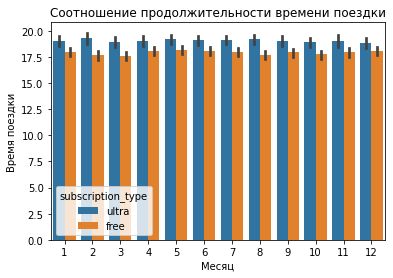

In [70]:
barplot = sns.barplot(
    data = service_info,
    x = 'month',
    y = 'duration',
    hue = 'subscription_type'
)
plt.figsize = (10, 10)
plt.title('Соотношение продолжительности времени поездки')
plt.ylabel('Время поездки')
plt.xlabel('Месяц');

По результатам проверки отвергаем нулевую гипотезу в пользу первой, т.е. продолжительность поездки у обычных пользователей меньше, чем у пользователей с подпиской.

### Гипотеза 2. Среднее расстояние, которое проезжают пользователи, не превышает 3130 метров.

**H0:** Среднее расстояние, которое проежают пользователи равно 3130 метров

**H1:** среднее расстояние больше 3130 метра

In [71]:
#массив со значениями расстояния
distance = service_info['distance']
#среднее растояние
average_distance = 3130

alpha = 0.05

result = st.ttest_1samp(
    distance,
    average_distance,
    alternative = 'greater'
)

print('p-значение', result.pvalue)
print()
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 0.9999999999995223

Не отвергаем нулевую гипотезу


В данном случае гипотеза о среднем расстоянии подтвердилась - расстояние не превышает 3130 метров.

### Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**H0:** Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки

**H1:** Помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки

In [72]:
#массив с помесячной выручкой от пользователей без подписки
month_revenue_free = pivot_info.loc[pivot_info['subscription_type'] == 'free', 'month_revenue']
#от пользователей с подпиской
month_revenue_ultra = pivot_info.loc[pivot_info['subscription_type'] == 'ultra', 'month_revenue']

alpha = 0.05

result = st.ttest_ind(
    month_revenue_ultra,
    month_revenue_free,
    alternative = 'greater'
)

print('p-значение', result.pvalue)
print()
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение 1.8850394384715216e-31

Отвергаем нулевую гипотезу


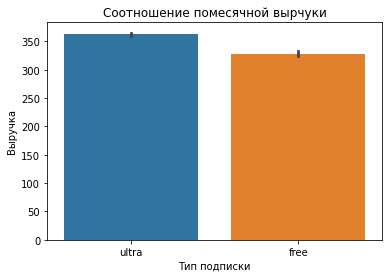

In [73]:
barplot = sns.barplot(
    data = pivot_info,
    x = 'subscription_type',
    y = 'month_revenue',
)
plt.figsize = (10, 10)
plt.title('Соотношение помесячной вырчуки')
plt.ylabel('Выручка')
plt.xlabel('Тип подписки');

Здесь также можно утверждать, что сумма выручки от пользователей с подпиской больше, чем от простых пользователей.

### Подбор соотвестсвующей гипотезы для проверки ситуации:

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест вам понадобился бы для проверки этой гипотезы?

**H0:** Количество обращений в тех.поддержку после обновления сервера равно количеству обращений до обновления

**H1:** Количество обращений в тех.поддержку после обновления сервера меньше количества обращений до обновленя

В данном случае нужно проверять зависимые или парные выборки: до изменения и после, а именно, сравниить средние значения. Для этого подойдет метод 'ttest_rel', который принимает два аргумента:
1. Выборка до изменения
2. Выборка после изменения

Важно, чтобы они были одинаковыми по размеру. Также стоит добавить атрибут 'alternative = "less"', т.к. проверяется левосторонняя альтернативная гипотеза.

## Шаг 7. Общий вывод

В ходе работы были изучены датафреймы с информацией о пользователях, поездках и подписках. Выявлены следующие проблемы:
 - тип данных у столбца с датами
 - слишком маленькие значения продолжительности поездки (0.5 минуты)
 - явные дубликаты в таблице с информацией о пользователях

В целом данные не содержат пропусков, сильных выбросов и разбросов значений.

Цель проекта и поставленные этапы выполненны - проведен анализ данных и проверено несколько гипотез,

Более выгодными пользователями являются оформившие подписку. На это указывают следующие факторы:
 - наличие абонентской платы
 - большая сумма выручки
 - большая продолжительность времени поездки на самокате